## Installing dependencies

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate
for dirname, _, filenames in os.walk('/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
df1 = pd.read_csv("Data/prevalence-by-mental-and-substance-use-disorder-AI.csv")
df2=pd.read_csv("Data/mental-and-substance-use-as-share-of-disease-AI.csv")

In [3]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [4]:
df2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189                                                
3                                           1.776779                                                
4                                           1.712986

In [5]:
#combining datasets
data = pd.merge(df1, df2)
data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                        

## Data Cleaning

In [6]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [7]:
data.drop('Code',axis=1,inplace=True)

In [8]:
data.head()

Entity  Year  \
0  Afghanistan  1990   
1  Afghanistan  1991   
2  Afghanistan  1992   
3  Afghanistan  1993   
4  Afghanistan  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.444036                                  
1                                           0.444250                                  
2                                           0.445501                                  
3                                           0.445958                                  
4                                           0.445779                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                           1.696670                                                
1                                           1.734281                                                
2                                           1.791189   

In [9]:
data.size,data.shape

(68400, (6840, 10))

In [10]:
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

C:\Users\RAJ\AppData\Local\Temp\ipykernel_20340\683401956.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)


In [11]:
data.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

### Exploratory Data Analysis

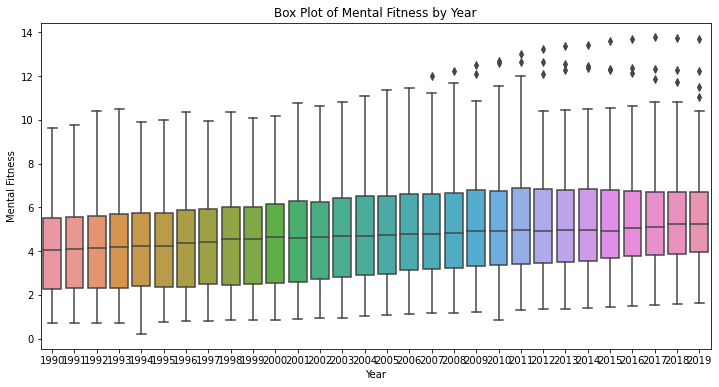

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='mental_fitness', data=data)
plt.title('Box Plot of Mental Fitness by Year')
plt.xlabel('Year')
plt.ylabel('Mental Fitness')
plt.show()


[]

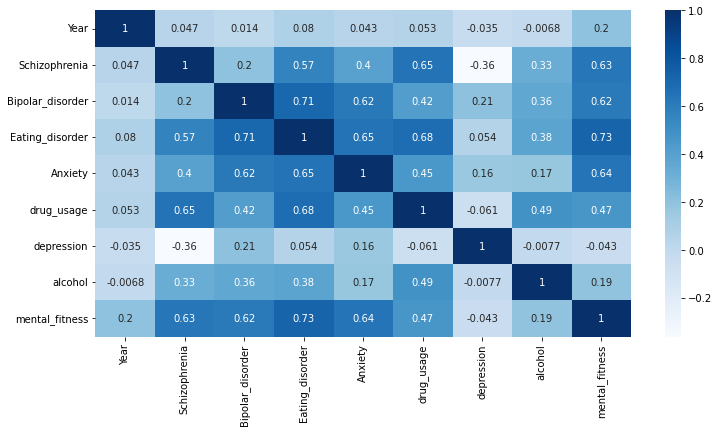

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

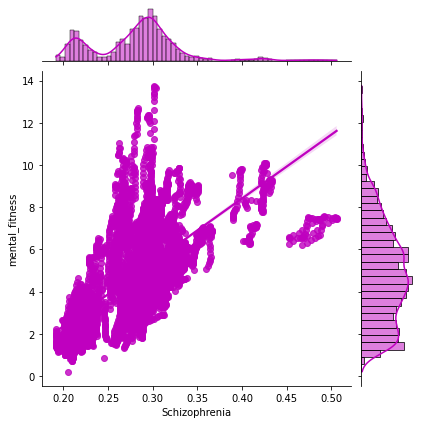

In [14]:
sns.jointplot(x='Schizophrenia',y='mental_fitness',data=data,kind='reg',color='m')
plt.show()

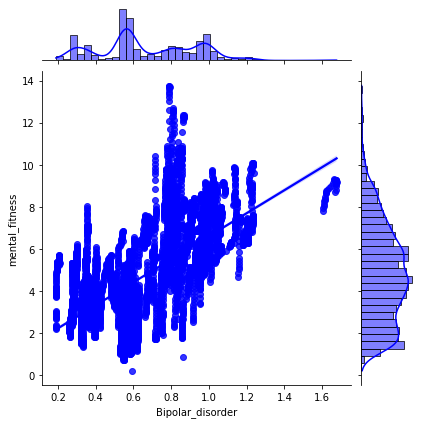

In [15]:
sns.jointplot(x='Bipolar_disorder',y='mental_fitness',data=data, kind='reg',color='blue')
plt.show()


In [17]:
mean = data['mental_fitness'].mean()
mean

4.8180618117506135

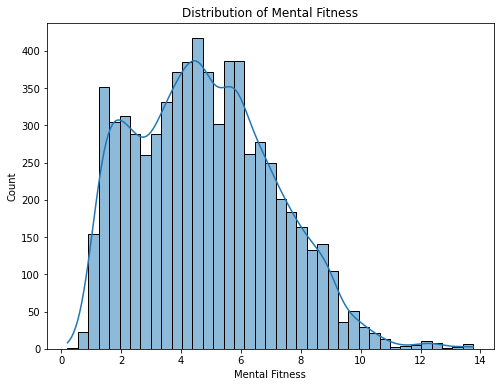

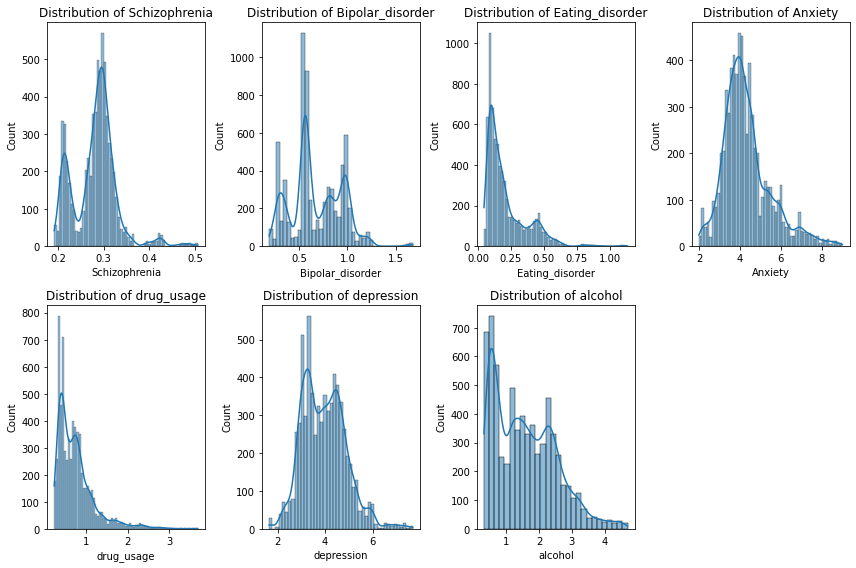

In [26]:
# Create a histogram and kernel density plot for the target variable (mental fitness)
plt.figure(figsize=(8, 6))
sns.histplot(data['mental_fitness'], kde=True)
plt.title('Distribution of Mental Fitness')
plt.xlabel('Mental Fitness')
plt.show()

# Create distribution plots for other numerical features (if needed)
plt.figure(figsize=(12, 8))
for col in numerical_columns[:-1]:  # Exclude the target variable from the loop
    plt.subplot(2, 4, numerical_columns.index(col) + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


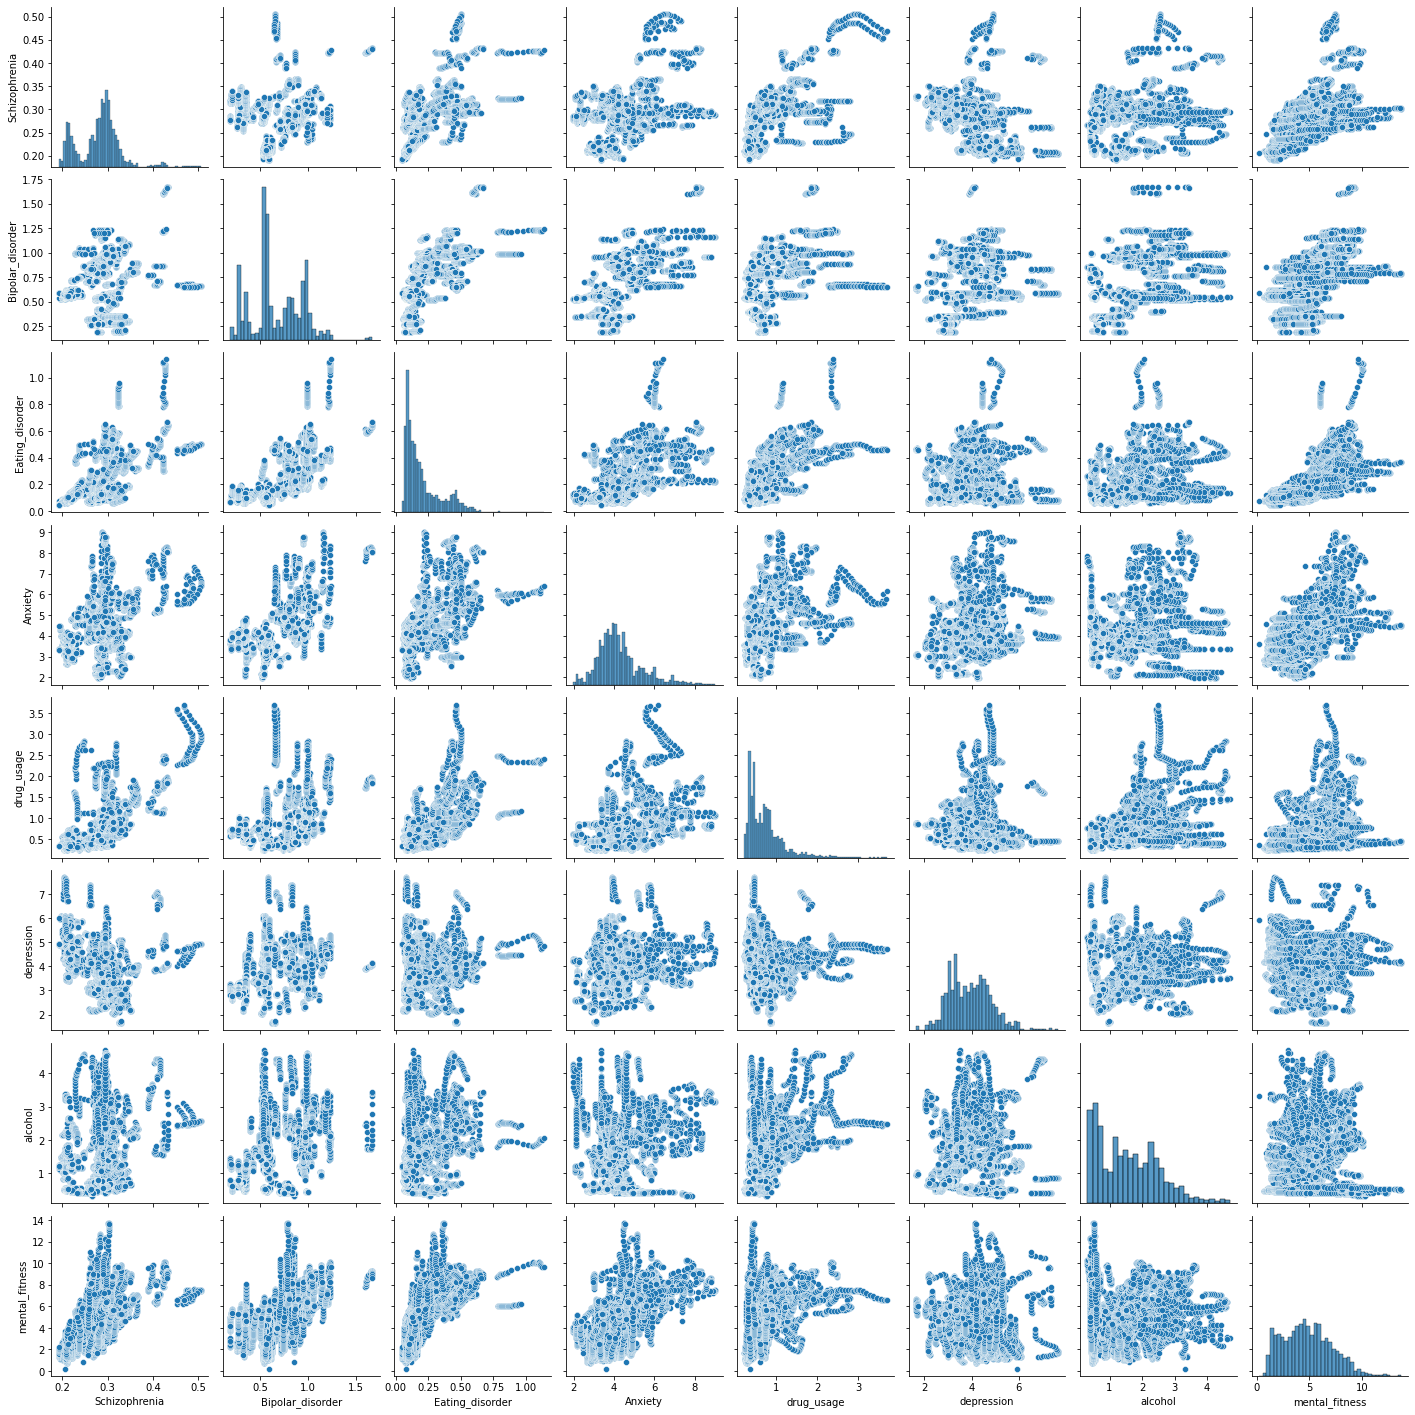

In [25]:
numerical_columns = ['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol', 'mental_fitness']

# Create the scatter plot matrix
sns.pairplot(data[numerical_columns])
plt.show()


In [18]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

In [19]:
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

## Yearwise variation in mental fitness pf different countires

In [15]:

# Create a time series line plot for mental fitness over the years
fig = px.line(data, x="Year", y="mental_fitness", color='Country', markers=True, template='plotly_dark',
              title='Time Series Plot of Mental Fitness over the Years')
fig.show()


In [16]:
df = data.copy()

In [17]:
df.head()

Country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [19]:
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [20]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

## Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse_lr = mean_squared_error(ytrain, ytrain_pred)
rmse_lr = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2_lr = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_lr))
print('RMSE is {}'.format(rmse_lr))
print('R2 score is {}'.format(r2_lr))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse_lr = mean_squared_error(ytest, ytest_pred)
rmse_lr = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2_lr = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_lr))
print('RMSE is {}'.format(rmse_lr))
print('R2 score is {}'.format(r2_lr))

The model performance for training set
--------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275


The model performance for testing set
--------------------------------------
MSE is 1.1357545319272409
RMSE is 1.0657178481789826
R2 score is 0.7638974087055268


## Random Forest Regressor

In [44]:

rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse_rf = mean_squared_error(ytrain, ytrain_pred)
rmse_rf = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2_rf = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_rf))
print('RMSE is {}'.format(rmse_rf))
print('R2 score is {}'.format(r2_rf))
print("\n")

# model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse_rf = mean_squared_error(ytest, ytest_pred)
rmse_rf = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2_rf = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_rf))
print('RMSE is {}'.format(rmse_rf))
print('R2 score is {}'.format(r2_rf))

The model performance for training set
--------------------------------------
MSE is 0.0050990851224267265
RMSE is 0.07140787857391316
R2 score is 0.9990510456514547


The model performance for testing set
--------------------------------------
MSE is 0.029256980207257286
RMSE is 0.1710467193700519
R2 score is 0.9939180090008859


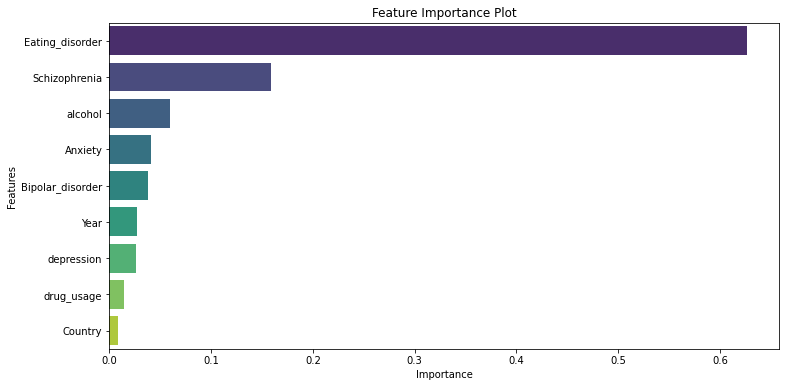

In [23]:
importance = rf.feature_importances_
feature_names = X.columns

# Sort the features based on importance in descending order
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Create a feature importance plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importance, y=sorted_features, palette='viridis')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


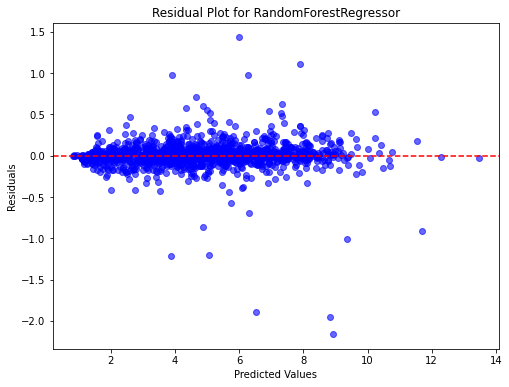

In [24]:
# Calculate residuals
residuals = ytest - ytest_pred

# Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(ytest_pred, residuals, alpha=0.6, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for RandomForestRegressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### The residuals are randomly scattered around the y=0 line, it suggests that the model's predictions are unbiased, and the model has captured the underlying patterns in the data well.

## Hyperparameter Tuning - Random Forest Regressor

In [41]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
}


In [45]:
s=StandardScaler()
xtest_scaled= s.fit_transform(xtest)

In [42]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_estimator_)


RandomForestRegressor(n_estimators=200)


In [43]:

# Best parameters and score
print("Best parameters found for Random Forest Regressor:")
print(grid_search.best_params_)
print("Best score found for Random Forest Regressor:")
print(grid_search.best_score_)

Best parameters found for Random Forest Regressor:
{'max_depth': None, 'n_estimators': 200}
Best score found for Random Forest Regressor:
0.9922647347981048


In [46]:
# Updated Random Forest Regressor
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(xtrain_scaled, ytrain)

# Model evaluation for training set
ytrain_pred = rf.predict(xtrain_scaled)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for the training set")
print("------------------------------------------")
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')
print()

# Model evaluation for testing set
ytest_pred = rf.predict(xtest_scaled)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

print("The model performance for the testing set")
print("-----------------------------------------")
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

The model performance for the training set
------------------------------------------
MSE: 0.00528298057701814
RMSE: 0.07268411502534884
R2 Score: 0.9990168221805532

The model performance for the testing set
-----------------------------------------
MSE: 0.18078118851960603
RMSE: 0.4251837114937566
R2 Score: 0.9624188978631273


## Gradient Boosting Regressor


In [33]:
# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ytest_pred_gb = gb_regressor.predict(xtest)

# Evaluate the model
mse_gb = mean_squared_error(ytest, ytest_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(ytest, ytest_pred_gb)

print("Gradient Boosting Regressor Evaluation:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R2 Score:", r2_gb)


Gradient Boosting Regressor Evaluation:
MSE: 0.24531770795821617
RMSE: 0.4952955763563977
R2 Score: 0.9490029360119989


## Suport Vector regressor


In [34]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create and train the SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(xtrain_scaled, ytrain)

# Make predictions on the test set
ytest_pred_svr = svr_regressor.predict(xtest_scaled)

# Evaluate the model
mse_svr = mean_squared_error(ytest, ytest_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(ytest, ytest_pred_svr)

print("Support Vector Regression Evaluation:")
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)
print("R2 Score:", r2_svr)

Support Vector Regression Evaluation:
MSE: 0.2402547142550473
RMSE: 0.490157846264902
R2 Score: 0.9500554397876144


## nueral network regressor

In [35]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(xtrain_scaled, ytrain, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
ytest_pred_nn = model.predict(xtest_scaled).flatten()

# Evaluate the model
mse_nn = mean_squared_error(ytest, ytest_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(ytest, ytest_pred_nn)

print("Neural Network Regression Evaluation:")
print("MSE:", mse_nn)
print("RMSE:", rmse_nn)
print("R2 Score:", r2_nn)

Epoch 1/100
137/137 [==============================] - 2s 5ms/step - loss: 10.2746 - val_loss: 2.7225
Epoch 2/100
137/137 [==============================] - 0s 3ms/step - loss: 1.7403 - val_loss: 1.4401
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 1.1683 - val_loss: 1.1080
Epoch 4/100
137/137 [==============================] - 0s 3ms/step - loss: 0.9332 - val_loss: 0.9353
Epoch 5/100
137/137 [==============================] - 0s 3ms/step - loss: 0.7855 - val_loss: 0.7758
Epoch 6/100
137/137 [==============================] - 0s 3ms/step - loss: 0.6778 - val_loss: 0.6651
Epoch 7/100
137/137 [==============================] - 0s 3ms/step - loss: 0.5884 - val_loss: 0.5853
Epoch 8/100
137/137 [==============================] - 0s 3ms/step - loss: 0.5251 - val_loss: 0.5168
Epoch 9/100
137/137 [==============================] - 0s 3ms/step - loss: 0.4741 - val_loss: 0.4720
Epoch 10/100
137/137 [==============================] - 0s 3ms/step - loss: 0.4354 - val_l

In [52]:
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'SVR', 'Neural Network Regressor'],
    'MSE': [mse_lr, mse_rf, mse_gb, mse_svr, mse_nn],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb, rmse_svr, rmse_nn],
    'R2 Score': [r2_lr, r2_rf, r2_gb, r2_svr, r2_nn]
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the table with borders
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════════════════╤═══════════╤══════════╤════════════╕
│ Model                       │       MSE │     RMSE │   R2 Score │
╞═════════════════════════════╪═══════════╪══════════╪════════════╡
│ Linear Regression           │ 1.13575   │ 1.06572  │   0.763897 │
├─────────────────────────────┼───────────┼──────────┼────────────┤
│ Random Forest Regressor     │ 0.029257  │ 0.171047 │   0.993918 │
├─────────────────────────────┼───────────┼──────────┼────────────┤
│ Gradient Boosting Regressor │ 0.245318  │ 0.495296 │   0.949003 │
├─────────────────────────────┼───────────┼──────────┼────────────┤
│ SVR                         │ 0.240255  │ 0.490158 │   0.950055 │
├─────────────────────────────┼───────────┼──────────┼────────────┤
│ Neural Network Regressor    │ 0.0746332 │ 0.273191 │   0.984485 │
╘═════════════════════════════╧═══════════╧══════════╧════════════╛
